In [1]:
import Feras_LCCM as lccm
import numpy as np
import pandas as pd
import pylogit
import warnings
from collections import OrderedDict

### 1. Model specification and fitting

In [2]:
## Load the data file
df = pd.read_csv('Qualtrics data long format.csv')

## Let's have a quick look at the long format data (first 5 rows)
df.head()

,custom_id,mode_id,choice,ID,tripID,toll,distance,Age,Gender,bike_ownership,Hhsize,HHIncome,car_ownership,travel_time,travel_cost
0,1,1,0,1,1,0,0.8,31,1,1,2,17,2,0.0627,0.1696
1,1,2,1,1,1,0,0.8,31,1,1,2,17,2,0.2667,0.0000
2,1,3,0,1,1,0,0.8,31,1,1,2,17,2,0.0667,0.0000
3,1,4,0,1,1,0,0.8,31,1,1,2,17,2,0.6207,1.4100
4,1,5,0,1,1,0,0.8,31,1,1,2,17,2,0.4450,1.4100


In [3]:
## Setting the number of classes in the model to 3
n_classes = 3

In [4]:
## Create a dummy variable to indicate whether the individual is male
df['male'] = (df['Gender']==1).astype(int)

## Create categorical variable to indicate income status
df['low_income'] = (df['HHIncome']<6).astype(int)
df['medium_income'] = ((df['HHIncome']>=6)&(df['HHIncome']<12)).astype(int)
df['high_income'] = ((df['HHIncome']>=12)&(df['HHIncome']<16)).astype(int)

In [5]:
## class_membership_spec defines the variables names to be used in the specification of the 
## class membership model.
class_membership_spec = ['intercept', 'car_ownership','bike_ownership',
                         'low_income','high_income','male','distance']

## class_membership_labels defines the names associated with each of the variables which
## will be displayed in the output table after estimation.
class_membership_labels = ['Class-specific constant', 'Car ownership',
                           'Bike ownership', 'Low Income','High Income', 
                           'Male','Distance Traveled (miles)']

In [52]:
## Each array entials the alternatives available in the choice set for each latent class 
avail_alts = (np.array([1,2,4,5,6]),
              np.array([1,2,3,4,5,6]),
              np.array([2,4,6]))

In [64]:
## class_specific_specs defines the variables names to be used in the specification of the 
## class specific choice model of each class.
class_specific_specs = [OrderedDict([('intercept', [2,4,5,6]), 
                                     ('travel_time', [[1,2,4,5,6]]),
                                     ('travel_cost', [[1,5],[4,6]])]),
                        
                        OrderedDict([('intercept', [2,3,4,5,6]), 
                                     ('travel_time', [[1,2,3,4,5,6]]),
                                     ('travel_cost', [[1,4,5,6]])]),
                        
                        OrderedDict([('intercept', [4,6]), 
                                     ('travel_time', [[2,4,6]]),
                                     ('travel_cost', [4,6])])]

## class_specific_labels defines the names associated with each of the variables which
## will be displayed in the output tables after estimation.
class_specific_labels = [OrderedDict([('ASC', ['ASC(Walk)','ASC(Walk to Transit)',
                                               'ASC(Drive to Transit)', 'ASC(Private Transit)']),
                                      ('Travel Time',['Travel Time']), 
                                      ('Travel Cost',['Travel Cost(Auto/Drive to Transit)',
                                                      'Travel Cost(Walk to Transit/Private Transit)'])]),
                         
                         OrderedDict([('ASC', ['ASC(Walk)','ASC(Bike)',
                                               'ASC(Walk to Transit)','ASC(Drive to Transit)',
                                               'ASC(Private Transit)']),
                                      ('Travel Time',['Travel Time']), 
                                      ('Travel Cost',['Travel Cost'])]),
                         
                         OrderedDict([('ASC', ['ASC(Walk to Transit)','ASC(Private Transit)']),
                                      ('Travel Time',['Travel Time']), 
                                      ('Travel Cost',['Travel Cost(Walk to Transit)',
                                                      'Travel Cost(Private Transit)'])])]

In [81]:
## Model fitting
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
 
    lccm.lccm_fit(data = df,
                  ind_id_col = 'ID', 
                  obs_id_col = 'custom_id',
                  alt_id_col = 'mode_id',
                  choice_col = 'choice', 
                  n_classes = n_classes,
                  class_membership_spec = class_membership_spec,
                  class_membership_labels = class_membership_labels,
                  class_specific_specs = class_specific_specs,
                  class_specific_labels = class_specific_labels,
                  avail_alts = avail_alts)     

Processing data
Initializing EM Algorithm...

<Thu, 14 Apr 2022 13:00:44> Iteration 0: -3618.5508
<Thu, 14 Apr 2022 13:00:44> Iteration 1: -2676.5498
<Thu, 14 Apr 2022 13:00:44> Iteration 2: -2666.5878
<Thu, 14 Apr 2022 13:00:44> Iteration 3: -2660.6807
<Thu, 14 Apr 2022 13:00:44> Iteration 4: -2656.9746
<Thu, 14 Apr 2022 13:00:45> Iteration 5: -2654.5174
<Thu, 14 Apr 2022 13:00:45> Iteration 6: -2652.8886
<Thu, 14 Apr 2022 13:00:45> Iteration 7: -2651.8661
<Thu, 14 Apr 2022 13:00:45> Iteration 8: -814.7436
<Thu, 14 Apr 2022 13:00:45> Iteration 9: -590.9265
<Thu, 14 Apr 2022 13:00:45> Iteration 10: -566.5371
<Thu, 14 Apr 2022 13:00:45> Iteration 11: -547.7077
<Thu, 14 Apr 2022 13:00:45> Iteration 12: -528.2739
<Thu, 14 Apr 2022 13:00:45> Iteration 13: -517.0052
<Thu, 14 Apr 2022 13:00:45> Iteration 14: -512.1743
<Thu, 14 Apr 2022 13:00:45> Iteration 15: -510.2090
<Thu, 14 Apr 2022 13:00:45> Iteration 16: -508.9828
<Thu, 14 Apr 2022 13:00:45> Iteration 17: -508.3232
<Thu, 14 Apr 2022 13

### 2. Simple analysis of the output model result

In [100]:
## Assign column names to the file where:
## id: individual no.
## classx: the probability of individual belonging to class x
## prob_y_z: the probability of individual choosing alternative z under class y
pd.set_option('display.max_columns', None)
res = pd.read_csv('ModelResultsSampleEnum.csv')

names = ['id']+['class1','class2','class3']  
for i in range(1, 4):
    for j in range(1, 7):
        names.append("prob_{}_{}".format(i, j))
 
res.columns = names               
res.head()

,id,class1,class2,class3,prob_1_1,prob_1_2,prob_1_3,prob_1_4,prob_1_5,prob_1_6,prob_2_1,prob_2_2,prob_2_3,prob_2_4,prob_2_5,prob_2_6,prob_3_1,prob_3_2,prob_3_3,prob_3_4,prob_3_5,prob_3_6
0,2.0,0.543739,0.189025,0.267236,1.916371,0.041936,2.000000e-200,0.017205,5.244117e-10,0.024489,1.283650,0.070908,0.113530,2.441999e-01,2.171111e-02,0.266001,2.000000e-200,0.543382,2.000000e-200,0.918344,0.107005,0.431268
1,3.0,0.432664,0.356999,0.210337,3.816816,0.080660,4.000000e-200,0.055419,1.117945e-09,0.047106,2.112939,0.765987,0.151903,4.212246e-01,4.688148e-02,0.501065,4.000000e-200,1.083254,4.000000e-200,1.840748,0.216237,0.859762
2,4.0,0.308646,0.609637,0.081717,2.867587,0.063304,3.000000e-200,0.032144,4.898287e-10,0.036965,1.859868,0.413972,0.162961,1.514079e-01,2.168545e-02,0.390106,3.000000e-200,1.054237,3.000000e-200,0.978621,0.130422,0.836720
3,5.0,0.369824,0.443312,0.186864,1.895837,0.045445,2.000000e-200,0.032189,3.825295e-18,0.026529,0.612974,1.196821,0.083347,7.891459e-201,7.891459e-201,0.106858,2.000000e-200,1.020979,2.000000e-200,0.119274,0.049449,0.810298
4,6.0,0.371805,0.472984,0.155211,2.856381,0.068588,3.000000e-200,0.034991,5.699447e-10,0.040040,0.885177,1.489000,0.135890,3.077045e-01,2.798919e-02,0.154240,3.000000e-200,1.053881,3.000000e-200,0.977978,0.131729,0.836411


In [113]:
## Consider an individual belongs to class x if prob(x,i) is the highest
## Split the data by class
res['max'] = res[['class1', 'class2', 'class3']].max(axis=1)
class1 = res[res['max']==res['class1']]
class2 = res[res['max']==res['class2']]
class3 = res[res['max']==res['class3']]

In [121]:
nums = [len(class1), len(class2), len(class3)]

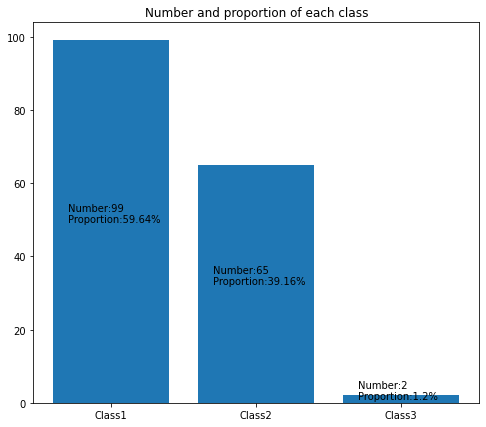

In [167]:
## Plot the membership share of each class
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(['Class1', 'Class2', 'Class3'], nums)

for x, y in enumerate(nums):
    plt.text(x-0.3, y/2, ('Proportion:'+str(round(100*y/sum(nums),2))+'%'))
    plt.text(x-0.3, y/2+3, ('Number:'+str(y)))

plt.title('Number and proportion of each class')
plt.show()